In [303]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [293]:
df = pd.read_csv("full_imidazole_arylation_data.csv")
df = df.dropna(axis='columns')
df = df.drop(columns = ['reaction_id','temperature_units','REAGENT_0_Mole_Value', 'REAGENT_0_Mole_Units', 
                        'CATALYST_0_Mole_Value','CATALYST_0_Mole_Units', 
                        'REACTANT_0_Mole_Units','REACTANT_1_SMILES','REACTANT_1_Mole_Value','REACTANT_1_Mole_Units',
                       'INTERNAL_STANDARD_0_SMILES','INTERNAL_STANDARD_0_Mole_Value','INTERNAL_STANDARD_0_Mole_Units', 'Product_0_SMILES',
                       'Product_1_SMILES', 'CATALYST_1_Mole_Units', 'SOLVENT_0_Volume_Units','CATALYST_1_SMILES', 'CATALYST_1_Mole_Value',
                       'REACTANT_0_SMILES','REACTANT_0_Mole_Value'])

df2 = pd.read_csv("temp_90_150_ia.csv")
df2 = df2.dropna(axis='columns')
df2 = df2.drop(columns = ['reaction_id','temperature_units','REAGENT_0_Mole_Value', 'REAGENT_0_Mole_Units', 
                        'CATALYST_0_Mole_Value','CATALYST_0_Mole_Units', 
                        'REACTANT_0_Mole_Units','REACTANT_1_SMILES','REACTANT_1_Mole_Value','REACTANT_1_Mole_Units',
                       'INTERNAL_STANDARD_0_SMILES','INTERNAL_STANDARD_0_Mole_Value','INTERNAL_STANDARD_0_Mole_Units', 'Product_0_SMILES',
                       'Product_1_SMILES', 'CATALYST_1_Mole_Units', 'SOLVENT_0_Volume_Units','CATALYST_1_SMILES', 'CATALYST_1_Mole_Value',
                       'REACTANT_0_SMILES','REACTANT_0_Mole_Value'])

df = df.append(df2)
df.head()

,temperature_value,REAGENT_0_SMILES,CATALYST_0_SMILES,SOLVENT_0_SMILES,SOLVENT_0_Volume_Value,Product_0_Yield_Percent
0,90,O=C([O-])C(C)(C)C.[Cs+],P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,CC(N(C)C)=O,98.039215,13.03
1,90,O=C([O-])C(C)(C)C.[Cs+],P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,CCCC#N,98.039215,2.98
2,90,O=C([O-])C(C)(C)C.[Cs+],P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,CCCCOC(C)=O,98.039215,0.36
3,90,O=C([O-])C(C)(C)C.[Cs+],P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,CC1=CC=C(C)C=C1,98.039215,0.54
4,90,O=C([O-])C(C)(C)C.[Cs+],C1(P(C2CCCCC2)C3CCCCC3)=CC=CC=C1C4=CC=CC=C4,CC(N(C)C)=O,98.039215,0.38


In [294]:
#make dummy variable categories
df = pd.get_dummies(df, columns=['temperature_value', 'SOLVENT_0_Volume_Value',
                                 'REAGENT_0_SMILES', 'SOLVENT_0_SMILES', 'CATALYST_0_SMILES'], drop_first=True)

In [295]:
df.columns = df.columns.str.replace('O\=C\(\[O\-\]\)C\(C\)\(C\)C.\[K\+\]','OCCK').str.replace('O\=C\(\[O\-\]\)C.\[Cs\+\]','OCCs').str.replace('O\=C\(\[O\-\]\)C.\[K\+\]','OCK').str.replace('CC1\=CC\=C\(C\)C\=C1','CC1').str.replace('CCCC\#N','CCN').str.replace('CCCCOC\(C\)\=O','COCO').str.replace('P\(C1\=CC\=CC\=C1\)\(C2CCCCC2\)C3\=CC\=CC\=C3','PC1').str.replace('.', '_')

df.head()

C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Product_0_Yield_Percent,temperature_value_105,temperature_value_120,SOLVENT_0_Volume_Value_150_0,SOLVENT_0_Volume_Value_263_1579,REAGENT_0_SMILES_OCCK,REAGENT_0_SMILES_OCCs,REAGENT_0_SMILES_OCK,SOLVENT_0_SMILES_CC1,SOLVENT_0_SMILES_CCN,SOLVENT_0_SMILES_COCO,CATALYST_0_SMILES_PC1
0,13.03,0,0,0,0,0,0,0,0,0,0,1
1,2.98,0,0,0,0,0,0,0,0,1,0,1
2,0.36,0,0,0,0,0,0,0,0,0,1,1
3,0.54,0,0,0,0,0,0,0,1,0,0,1
4,0.38,0,0,0,0,0,0,0,0,0,0,0


In [324]:
#check which variables are significant and thus would need to keep
formula = 'Product_0_Yield_Percent ~temperature_value_105 + temperature_value_120 + SOLVENT_0_Volume_Value_150_0 + SOLVENT_0_Volume_Value_263_1579 + REAGENT_0_SMILES_OCCK + REAGENT_0_SMILES_OCCs + REAGENT_0_SMILES_OCK + SOLVENT_0_SMILES_CC1 + SOLVENT_0_SMILES_CCN + SOLVENT_0_SMILES_COCO + CATALYST_0_SMILES_PC1'

model = smf.ols(formula=formula, data= df).fit()
print(model.summary())
print(model.pvalues)
print(model.pvalues<0.05)

                               OLS Regression Results                              
Dep. Variable:     Product_0_Yield_Percent   R-squared:                       0.550
Model:                                 OLS   Adj. R-squared:                  0.532
Method:                      Least Squares   F-statistic:                     30.70
Date:                     Sat, 07 Dec 2024   Prob (F-statistic):           8.04e-42
Time:                             13:52:12   Log-Likelihood:                -989.48
No. Observations:                      288   AIC:                             2003.
Df Residuals:                          276   BIC:                             2047.
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [325]:
def fit_and_predict(train_data, test_data, formula):

    model = smf.ols(formula=formula, data=train_data).fit()
    test_data.loc[:, 'predicted_yield'] = model.predict(test_data)
    
    # Compute RMSE for the training set
    residuals = train_data.loc[:,'Product_0_Yield_Percent'] - model.predict(train_data)
    train_rmse = np.sqrt(np.mean(residuals**2))  # RMSE formula
    
    r_squared = model.rsquared
    
    residuals = model.resid
    fig = qqplot(residuals, line='45', fit=True)
    plt.title("QQ Plot of Residuals")
    plt.show()
    
    fitted_values = model.fittedvalues
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(fitted_values, residuals, alpha=0.7)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_title("Residuals vs. Fitted Values")
    ax.set_xlabel("Fitted Values")
    ax.set_ylabel("Residuals")
    plt.show()
    
    return model, test_data, train_rmse, r_squared

In [328]:
df_init = df.loc[
    (
        (df["temperature_value_105"] == 1) & 
        (df["SOLVENT_0_Volume_Value_150_0"] == 1) &  
        (df["REAGENT_0_SMILES_OCK"] == 1) & 
        (df["SOLVENT_0_SMILES_CCN"] == 0) & 
        (df["SOLVENT_0_SMILES_CC1"] == 0) & 
        (df["SOLVENT_0_SMILES_COCO"] == 0) & 
        (df["CATALYST_0_SMILES_PC1"] == 1)
    ) | 
    (
        (df["temperature_value_105"] == 1) & 
        (df["SOLVENT_0_Volume_Value_150_0"] == 1) &  
        (df["REAGENT_0_SMILES_OCK"] == 1) & 
        (df["SOLVENT_0_SMILES_CCN"] == 1) & 
        (df["CATALYST_0_SMILES_PC1"] == 1)
    ) | 
    (
        (df["temperature_value_105"] == 1) & 
        (df["SOLVENT_0_Volume_Value_150_0"] == 1) &  
        (df["REAGENT_0_SMILES_OCCs"] == 1) & 
        (df["SOLVENT_0_SMILES_CC1"] == 1) & 
        (df["CATALYST_0_SMILES_PC1"] == 1)
    ) | 
    (
        (df["temperature_value_105"] == 1) & 
        (df["SOLVENT_0_Volume_Value_150_0"] == 1) &  
        (df["REAGENT_0_SMILES_OCCK"] == 0) & 
        (df["REAGENT_0_SMILES_OCCs"] == 0) &
        (df["REAGENT_0_SMILES_OCK"] == 0) &
        (df["SOLVENT_0_SMILES_CC1"] == 1) &  
        (df["CATALYST_0_SMILES_PC1"] == 0)
    ) | 
    (
        (df["temperature_value_105"] == 1) & 
        (df["SOLVENT_0_Volume_Value_150_0"] == 1) &  
        (df["REAGENT_0_SMILES_OCCK"] == 1) & 
        (df["SOLVENT_0_SMILES_CCN"] == 1) & 
        (df["CATALYST_0_SMILES_PC1"] == 0)
    ) | 
    (
        (df["temperature_value_105"] == 1) & 
        (df["SOLVENT_0_Volume_Value_263_1579"] == 1) &  
        (df["REAGENT_0_SMILES_OCK"] == 1) & 
        (df["SOLVENT_0_SMILES_CC1"] == 1) & 
        (df["CATALYST_0_SMILES_PC1"] == 1)
    ) | 
    (
        (df["temperature_value_105"] == 1) & 
        (df["SOLVENT_0_Volume_Value_150_0"] == 1) &  
        (df["REAGENT_0_SMILES_OCK"] == 1) & 
        (df["SOLVENT_0_SMILES_COCO"] == 1) & 
        (df["CATALYST_0_SMILES_PC1"] == 1)
    )| 
    (
        (df["temperature_value_120"] == 1) & 
        (df["SOLVENT_0_Volume_Value_150_0"] == 1) &  
        (df["REAGENT_0_SMILES_OCK"] == 1) & 
        (df["SOLVENT_0_SMILES_CC1"] == 1) & 
        (df["CATALYST_0_SMILES_PC1"] == 0)
    )
]

df_init

,Product_0_Yield_Percent,temperature_value_105,temperature_value_120,SOLVENT_0_Volume_Value_150_0,SOLVENT_0_Volume_Value_263_1579,REAGENT_0_SMILES_OCCK,REAGENT_0_SMILES_OCCs,REAGENT_0_SMILES_OCK,SOLVENT_0_SMILES_CC1,SOLVENT_0_SMILES_CCN,SOLVENT_0_SMILES_COCO,CATALYST_0_SMILES_PC1
103,0.49,1,0,1,0,0,0,0,1,0,0,0
109,0.93,1,0,1,0,1,0,0,0,1,0,0
115,2.68,1,0,1,0,0,1,0,1,0,0,1
120,29.40,1,0,1,0,0,0,1,0,0,0,1
121,5.73,1,0,1,0,0,0,1,0,1,0,1
122,2.40,1,0,1,0,0,0,1,0,0,1,1
155,1.49,1,0,0,1,0,0,1,1,0,0,1
223,5.09,0,1,1,0,0,0,1,1,0,0,0



Iteration 1


C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


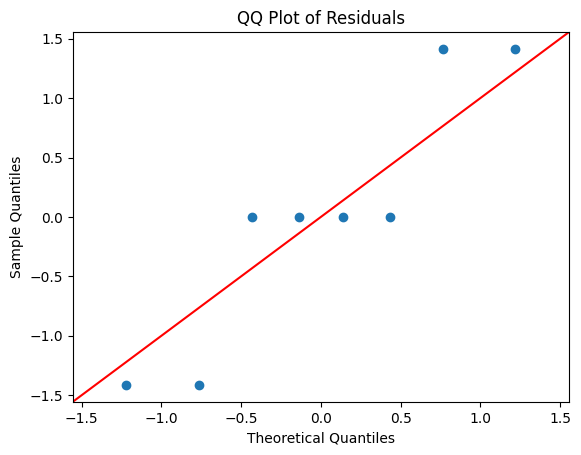

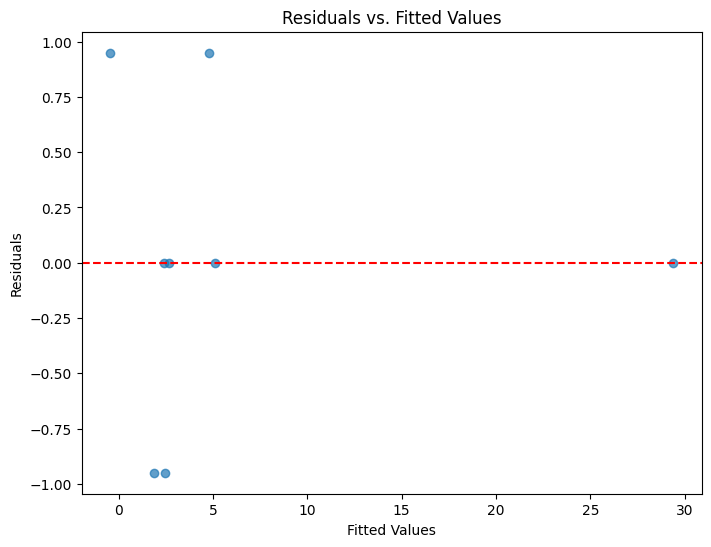

Train RMSE: 0.6718
R-squared: 0.9944362502646297
                               OLS Regression Results                              
Dep. Variable:     Product_0_Yield_Percent   R-squared:                       0.994
Model:                                 OLS   Adj. R-squared:                  0.961
Method:                      Least Squares   F-statistic:                     29.79
Date:                     Sat, 07 Dec 2024   Prob (F-statistic):              0.139
Time:                             13:53:04   Log-Likelihood:                -8.1686
No. Observations:                        8   AIC:                             30.34
Df Residuals:                            1   BIC:                             30.89
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------

C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


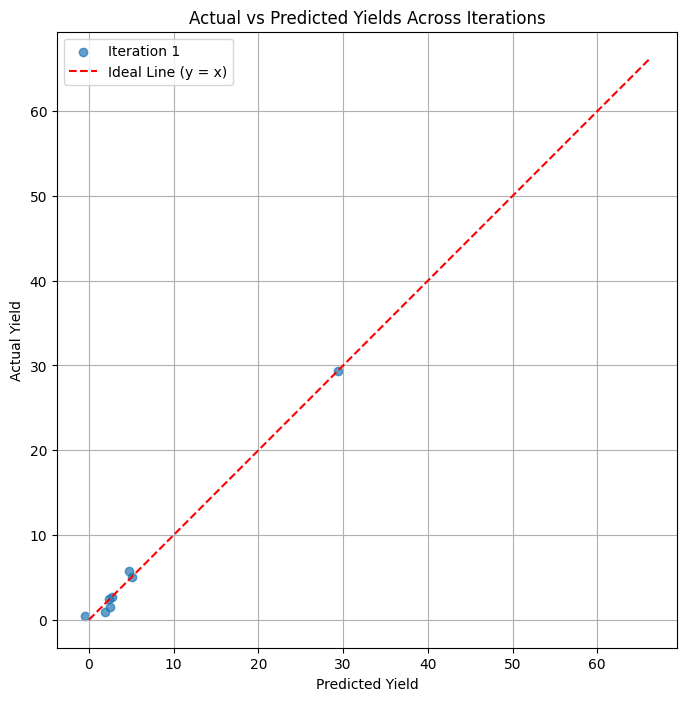


Iteration 2


C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


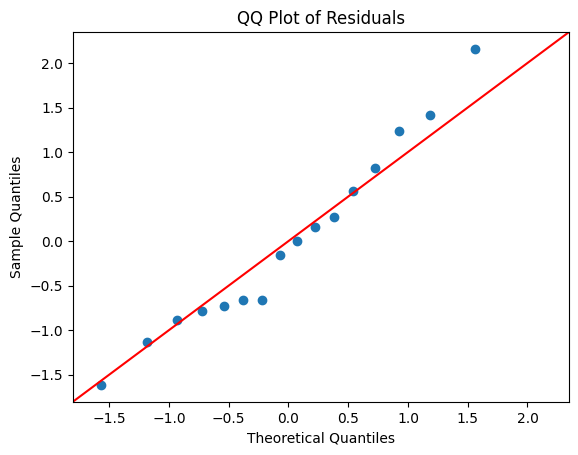

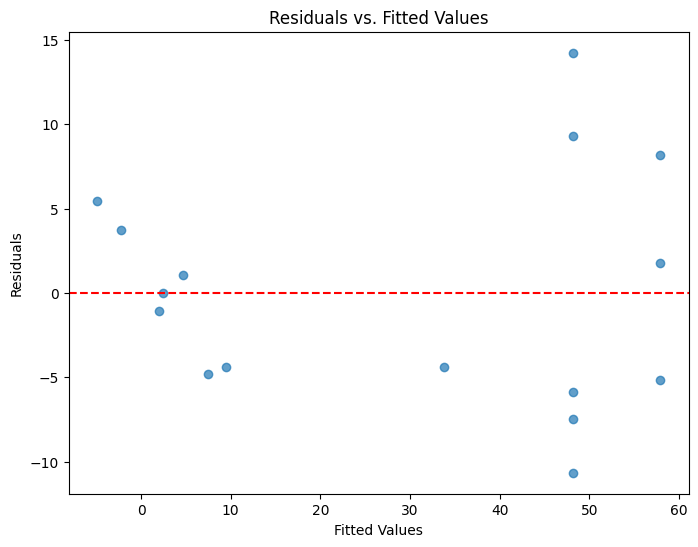

Train RMSE: 6.5997
R-squared: 0.9308036009248626
                               OLS Regression Results                              
Dep. Variable:     Product_0_Yield_Percent   R-squared:                       0.931
Model:                                 OLS   Adj. R-squared:                  0.885
Method:                      Least Squares   F-statistic:                     20.18
Date:                     Sat, 07 Dec 2024   Prob (F-statistic):           9.60e-05
Time:                             13:53:05   Log-Likelihood:                -52.895
No. Observations:                       16   AIC:                             119.8
Df Residuals:                            9   BIC:                             125.2
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------

C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


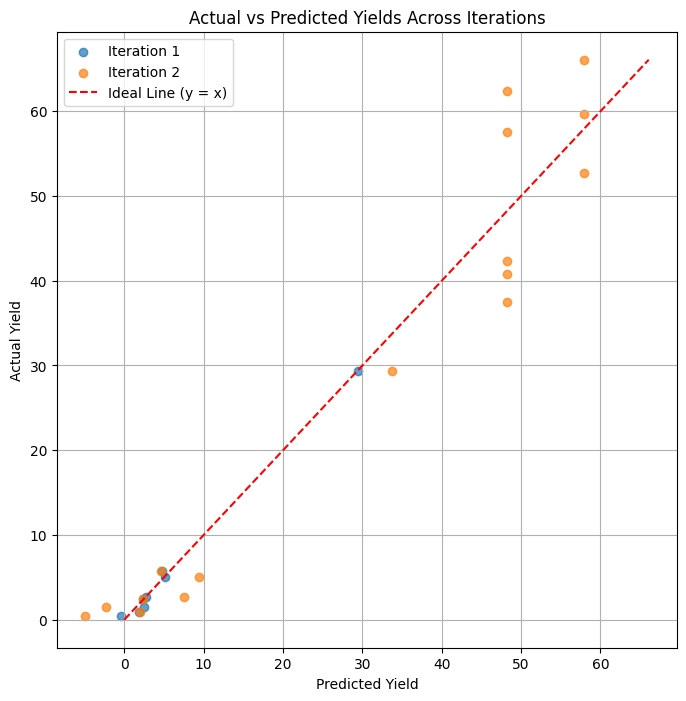


Iteration 3


C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


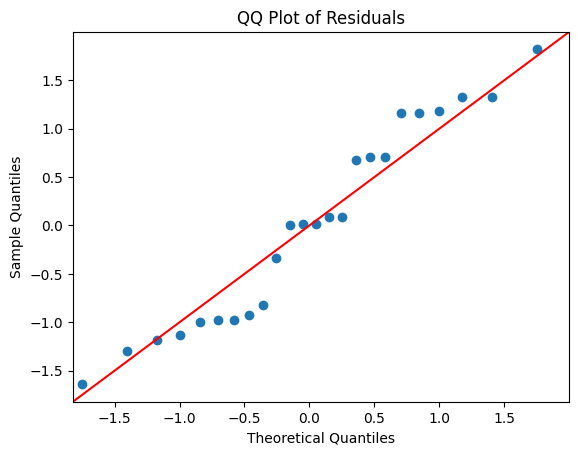

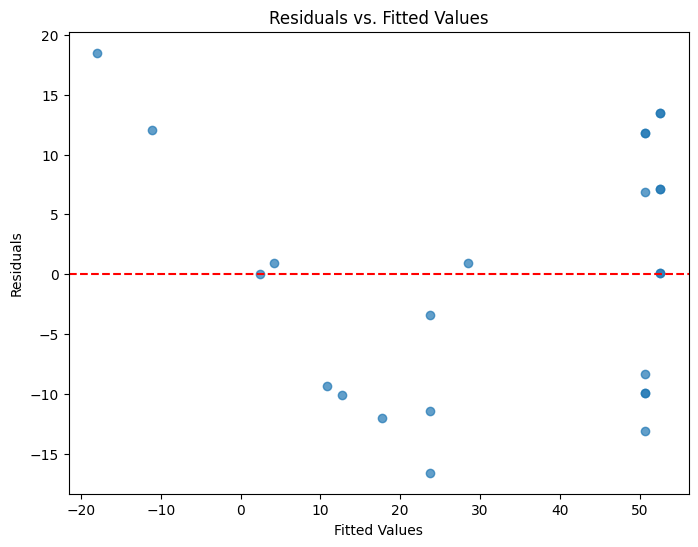

Train RMSE: 10.1434
R-squared: 0.8318387262435125
                               OLS Regression Results                              
Dep. Variable:     Product_0_Yield_Percent   R-squared:                       0.832
Model:                                 OLS   Adj. R-squared:                  0.772
Method:                      Least Squares   F-statistic:                     14.02
Date:                     Sat, 07 Dec 2024   Prob (F-statistic):           9.44e-06
Time:                             13:53:06   Log-Likelihood:                -89.658
No. Observations:                       24   AIC:                             193.3
Df Residuals:                           17   BIC:                             201.6
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

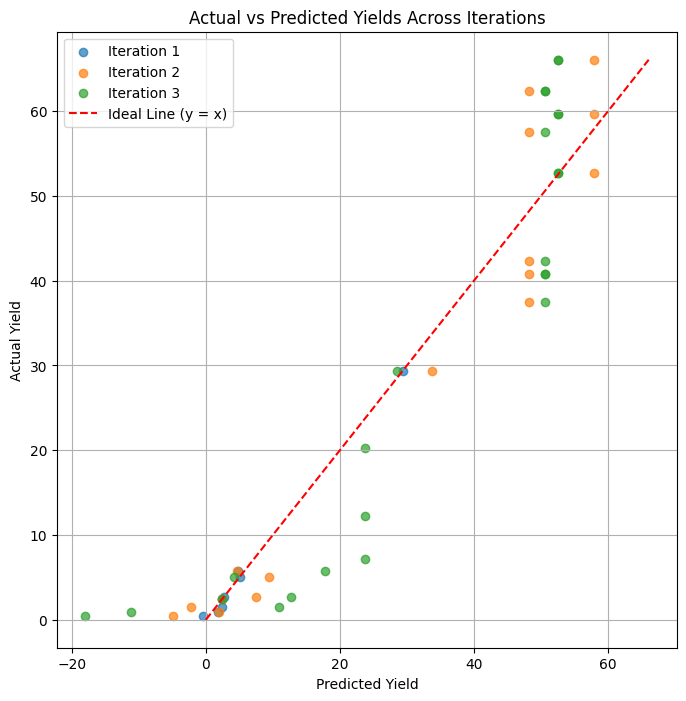


Iteration 4


C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


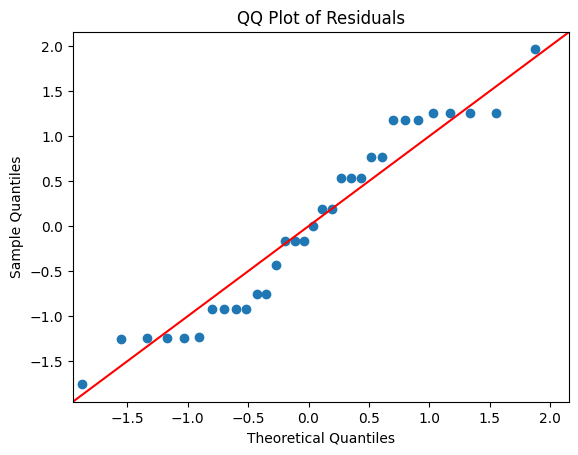

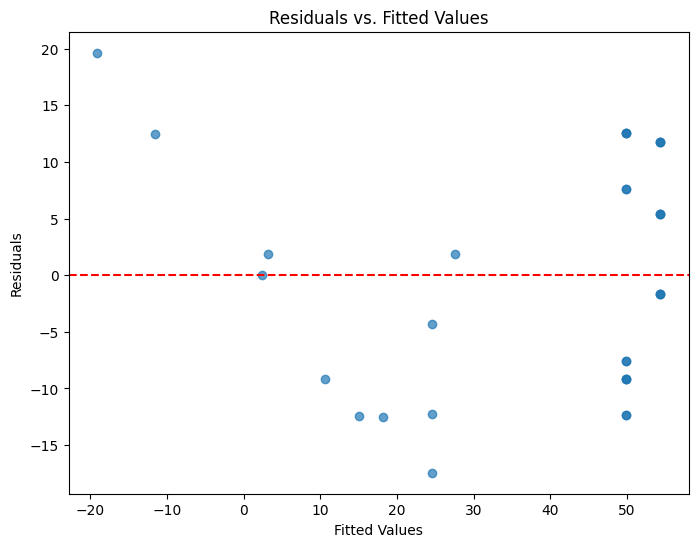

Train RMSE: 9.9708
R-squared: 0.8212433001356043
                               OLS Regression Results                              
Dep. Variable:     Product_0_Yield_Percent   R-squared:                       0.821
Model:                                 OLS   Adj. R-squared:                  0.778
Method:                      Least Squares   F-statistic:                     19.14
Date:                     Sat, 07 Dec 2024   Prob (F-statistic):           3.07e-08
Time:                             13:53:06   Log-Likelihood:                -119.00
No. Observations:                       32   AIC:                             252.0
Df Residuals:                           25   BIC:                             262.3
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------

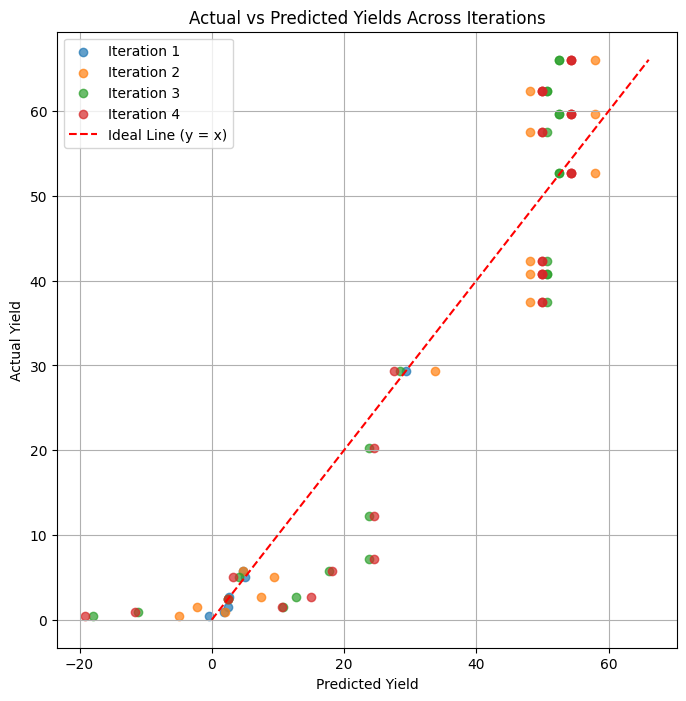


Iteration 5


C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


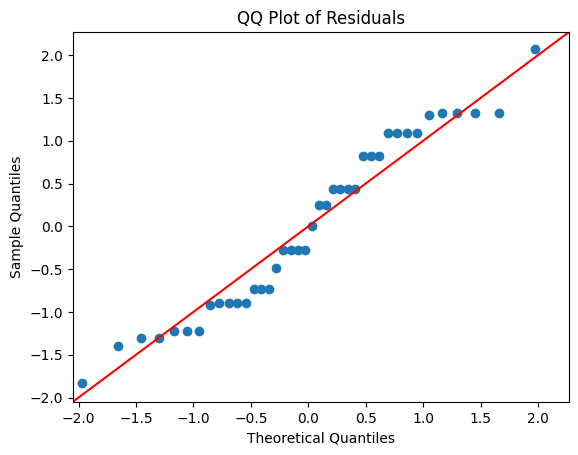

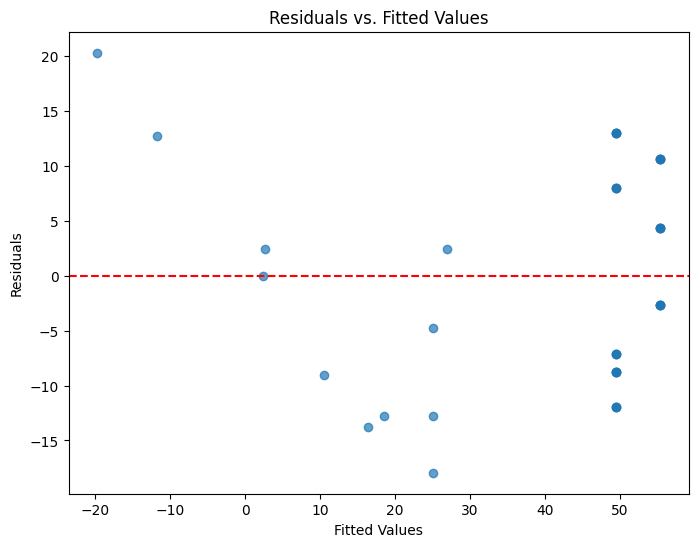

Train RMSE: 9.7968
R-squared: 0.8079941013122097
                               OLS Regression Results                              
Dep. Variable:     Product_0_Yield_Percent   R-squared:                       0.808
Model:                                 OLS   Adj. R-squared:                  0.773
Method:                      Least Squares   F-statistic:                     23.14
Date:                     Sat, 07 Dec 2024   Prob (F-statistic):           1.62e-10
Time:                             13:53:06   Log-Likelihood:                -148.04
No. Observations:                       40   AIC:                             310.1
Df Residuals:                           33   BIC:                             321.9
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------

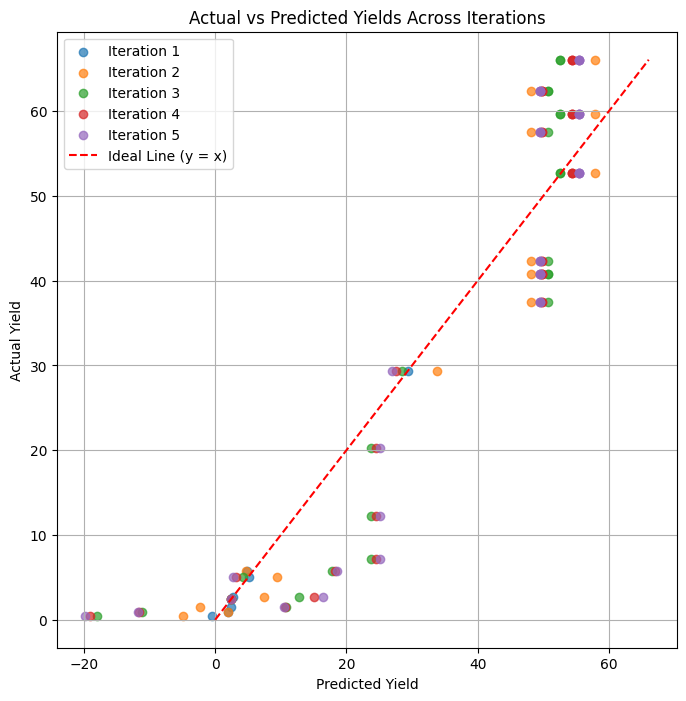


Iteration 6


C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


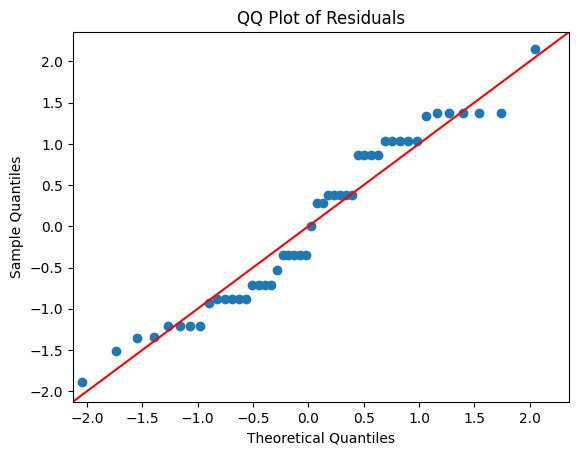

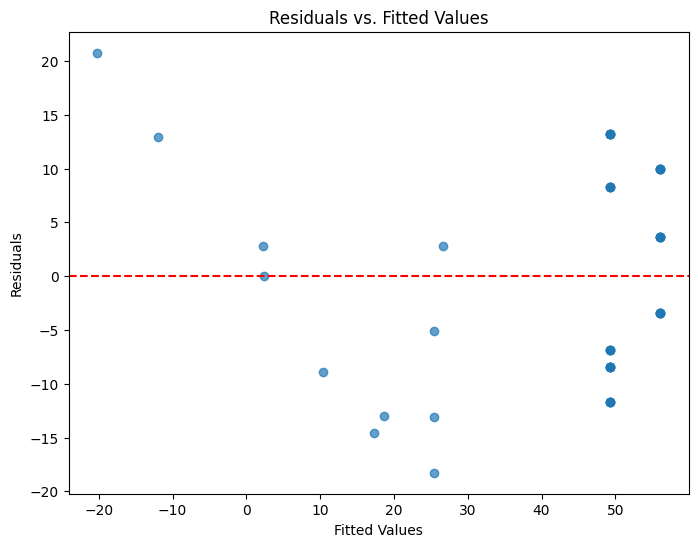

Train RMSE: 9.6510
R-squared: 0.7943031190394988
                               OLS Regression Results                              
Dep. Variable:     Product_0_Yield_Percent   R-squared:                       0.794
Model:                                 OLS   Adj. R-squared:                  0.764
Method:                      Least Squares   F-statistic:                     26.39
Date:                     Sat, 07 Dec 2024   Prob (F-statistic):           1.30e-12
Time:                             13:53:07   Log-Likelihood:                -176.93
No. Observations:                       48   AIC:                             367.9
Df Residuals:                           41   BIC:                             381.0
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------

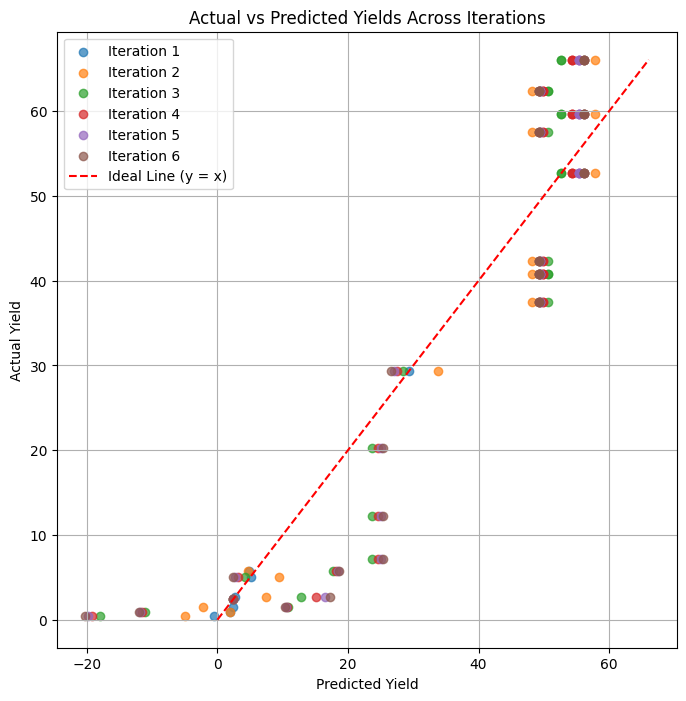


Iteration 7


C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


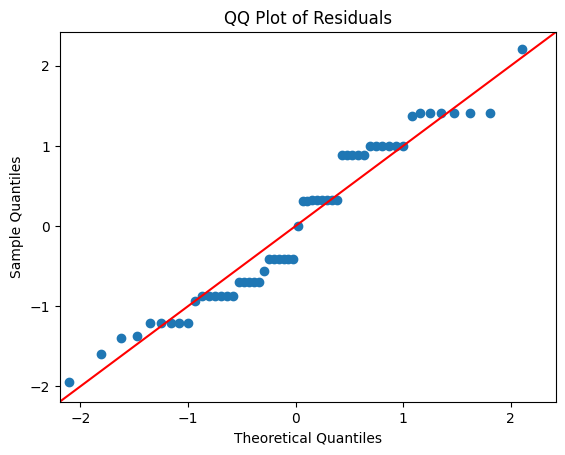

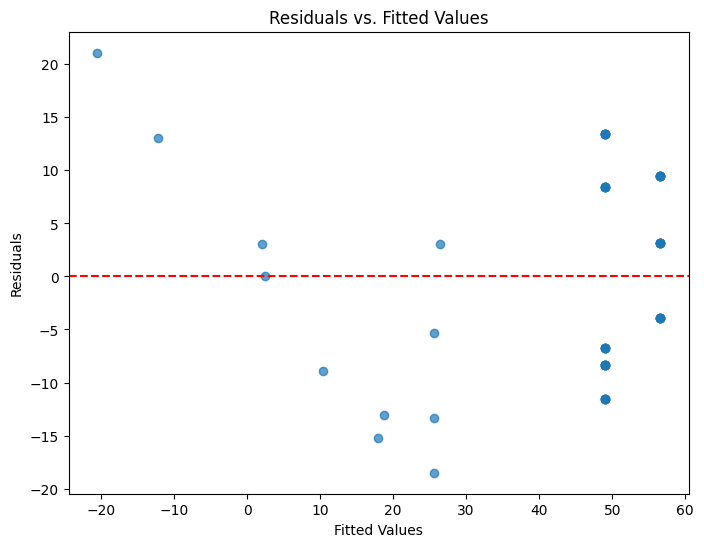

Train RMSE: 9.5318
R-squared: 0.7808210583469943
                               OLS Regression Results                              
Dep. Variable:     Product_0_Yield_Percent   R-squared:                       0.781
Model:                                 OLS   Adj. R-squared:                  0.754
Method:                      Least Squares   F-statistic:                     29.09
Date:                     Sat, 07 Dec 2024   Prob (F-statistic):           1.49e-14
Time:                             13:53:07   Log-Likelihood:                -205.72
No. Observations:                       56   AIC:                             425.4
Df Residuals:                           49   BIC:                             439.6
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------

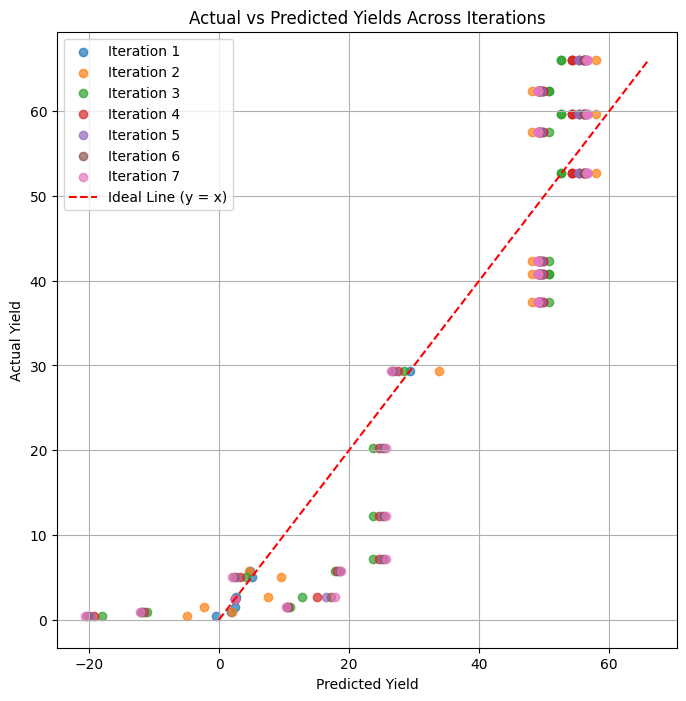


Iteration 8


C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


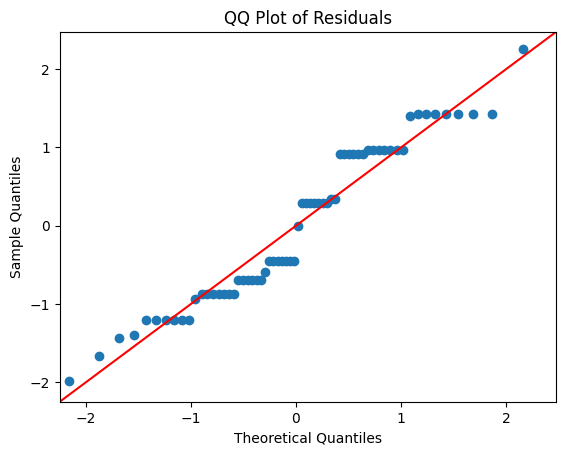

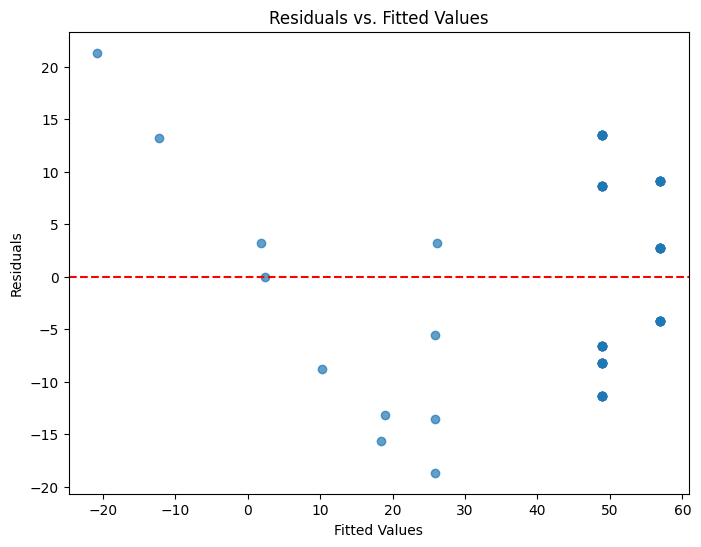

Train RMSE: 9.4341
R-squared: 0.7677799153667006
                               OLS Regression Results                              
Dep. Variable:     Product_0_Yield_Percent   R-squared:                       0.768
Model:                                 OLS   Adj. R-squared:                  0.743
Method:                      Least Squares   F-statistic:                     31.41
Date:                     Sat, 07 Dec 2024   Prob (F-statistic):           2.29e-16
Time:                             13:53:08   Log-Likelihood:                -234.45
No. Observations:                       64   AIC:                             482.9
Df Residuals:                           57   BIC:                             498.0
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------

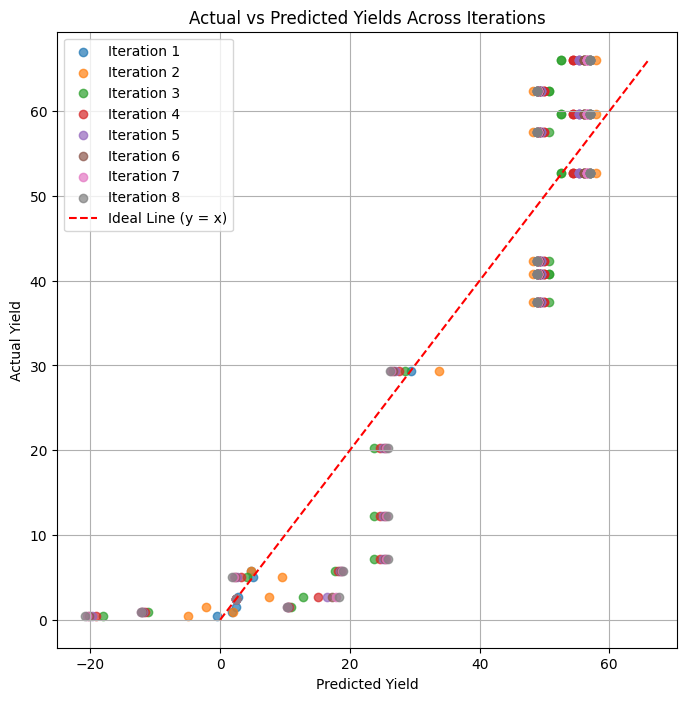

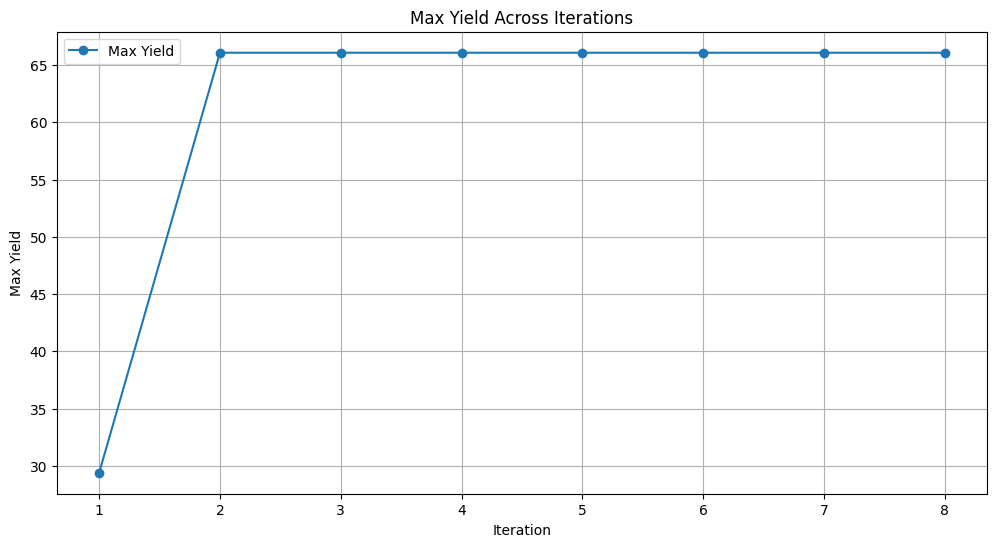

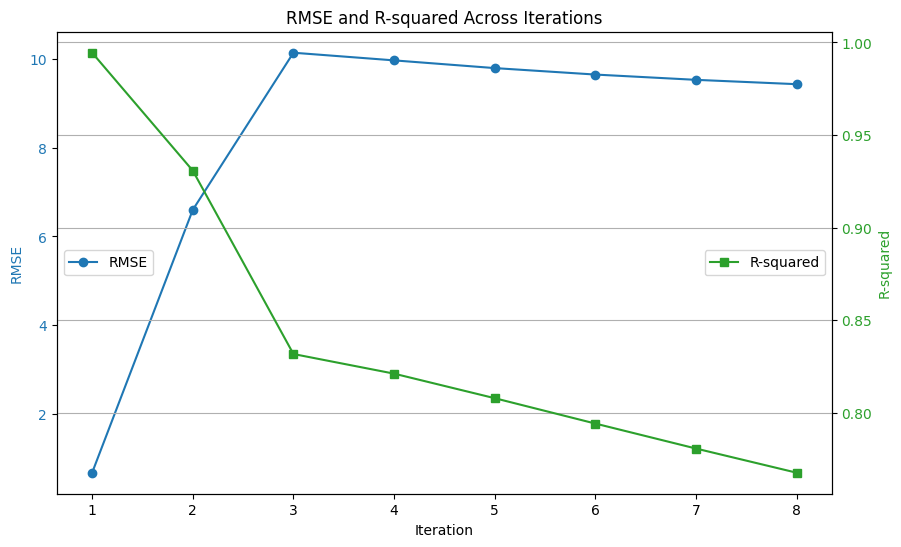

In [329]:
formula = 'Product_0_Yield_Percent ~temperature_value_105 + temperature_value_120  + REAGENT_0_SMILES_OCCs  + SOLVENT_0_SMILES_CC1 + SOLVENT_0_SMILES_CCN + SOLVENT_0_SMILES_COCO + CATALYST_0_SMILES_PC1'
iteration = 0
rmse_list = []
r_squared_list = []
actual_vs_predicted = []
max_yields = [] 
last_max_yield = 0;
counter = 0;

while counter < 7:
    print(f"\nIteration {iteration + 1}")
    iteration = iteration +1

    train_data = df_init
    test_data = df[~df.index.isin(train_data.index)]

    model, test_data, train_rmse, r_squared = fit_and_predict(train_data, test_data, formula)
    
    max_yield_current = train_data.loc[:,'Product_0_Yield_Percent'].max()
    max_yields.append(max_yield_current) 
    if max_yield_current > last_max_yield:
        last_max_yield = max_yield_current
        counter = 0;
    counter = counter + 1

    rmse_list.append(train_rmse)
    r_squared_list.append(r_squared)
    actual_vs_predicted.append((train_data.loc[:,'Product_0_Yield_Percent'], model.predict(train_data)))
 
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"R-squared: {r_squared}")
    print(model.summary())
    
    top_8 = test_data.nlargest(8, 'predicted_yield')
    
    matched_rows = df.loc[top_8.index]
    matched_rows = matched_rows.drop(columns=['predicted_yield'], errors='ignore')
    df_init = pd.concat([df_init, matched_rows], ignore_index=True)
    
    plt.figure(figsize=(8, 8))
    for i, (actual, predicted) in enumerate(actual_vs_predicted):
        plt.scatter(predicted, actual, label=f'Iteration {i + 1}', alpha=0.7)

    # Add ideal y = x line
    plt.plot([df.loc[:,'Product_0_Yield_Percent'].min(), df.loc[:,'Product_0_Yield_Percent'].max()],
             [df.loc[:,'Product_0_Yield_Percent'].min(), df.loc[:,'Product_0_Yield_Percent'].max()],
             color='red', linestyle='--', label='Ideal Line (y = x)')

    plt.xlabel('Predicted Yield')
    plt.ylabel('Actual Yield')
    plt.title('Actual vs Predicted Yields Across Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()
      
    
#plots
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(max_yields) + 1), max_yields, marker='o', label='Max Yield')
plt.xlabel('Iteration')
plt.ylabel('Max Yield')
plt.title('Max Yield Across Iterations')
plt.grid(True)
plt.legend()
plt.show()



# Plot RMSE and R-squared Trends
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE
ax1.set_xlabel('Iteration')
ax1.set_ylabel('RMSE', color='tab:blue')
ax1.plot(range(1, len(rmse_list) + 1), rmse_list, marker='o', color='tab:blue', label='RMSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='center left')

# Plot R-squared on the same axis
ax2 = ax1.twinx()
ax2.set_ylabel('R-squared', color='tab:green')
ax2.plot(range(1, len(r_squared_list) + 1), r_squared_list, marker='s', color='tab:green', label='R-squared')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='center right')

plt.title('RMSE and R-squared Across Iterations')
plt.grid(True)
plt.show()